<div align=center>

# Example Jupyter Notebook

</div>

## Check if the kernel is up and working

In [2]:
print("Kernel works!")

Kernel works!


## Perform basic operations to test installed packages

In [3]:
import torch
# Print PyTorch version
print(f"PyTorch version: {torch.__version__}")

# Check if GPU is available
gpu_available = torch.cuda.is_available()

if gpu_available:
    print("GPUs are available!")
    print("Amount of available GPUs:", torch.cuda.device_count())
    for i in range(torch.cuda.device_count()):
        print(f"GPU {i} name:", torch.cuda.get_device_name(i))
else:
    print("GPU is not available. Will use CPU instead")

PyTorch version: 2.5.0+cu124
GPUs are available!
Amount of available GPUs: 1
GPU 0 name: NVIDIA GeForce GTX 1660


## Setup the workflow
<div align=center>

![pytorch_workflow](pytorch_workflow.png)

</div>

### Define a plotting function

In [4]:
import matplotlib.pyplot as plt
from pathlib import Path

def plot_data(train_data, test_data, train_labels, test_labels, title, predictions=None):
    """
    Plots a given function.

    Parameters:
        func: A function to plot (takes a numpy array as input).
        title: Title of the plot.
        x_range: Tuple indicating the range of x values (default is (-10, 10)).
        num_points: Number of points to plot (default is 100).
    """

    # Set the font to be JetBrains Mono
    font_path = Path("../fonts/JetBrainsMono-Regular.ttf")

    # Set the dark mode
    plt.style.use('dark_background')

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(train_data, train_labels, c="green", label="Training data")
    plt.scatter(train_data, train_labels, c="green")

    plt.plot(test_data, test_labels, c="orange", label="Testing data")
    plt.scatter(test_data, test_labels, c="orange")

    if predictions is not None:
        plt.plot(test_data, predictions, c="red", label="Model predictions")

    # Setting up axes
    plt.title(title, font=font_path, fontsize=16)
    plt.xlabel('X', font=font_path, fontsize=14)
    plt.ylabel('Y', font=font_path, fontsize=14)

    # Add grid and axes lines
    plt.axhline(0, color='white', lw=0.5, ls='--')
    plt.axvline(0, color='white', lw=0.5, ls='--')
    plt.grid(color='gray', linestyle='--', linewidth=0.5)

    # Customize ticks
    plt.xticks(font=font_path)
    plt.yticks(font=font_path)

    # Add a legend
    plt.legend(prop=font_path)

### Generate example data

In [5]:
# Set the random seed for reproducibility
torch.manual_seed(42)

# Number of samples
num_samples = 25

# Generate random input features (x) and corresponding labels (y)
X = torch.linspace(0, 1, num_samples).unsqueeze(1)  # Shape (10, 1)
# Let's assume a linear relationship: y = 2 * x + 1
y = 0.7 * X + 0.3

# Create train/test split
train_split = int(0.5 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

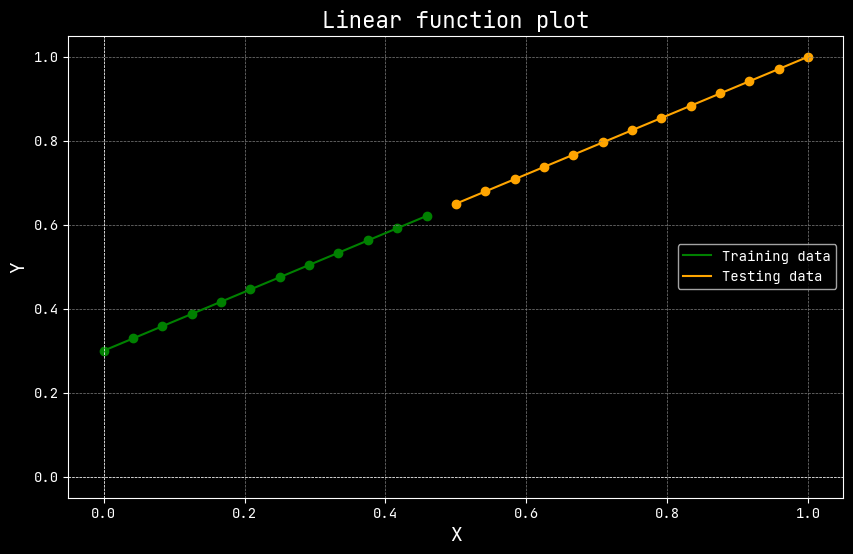

In [6]:
# Plot the data
plot_data(X_train, X_test, y_train, y_test, 'Linear function plot')